# 1.Data Description

In [85]:
import pandas as pd

df_train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

df_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
df_train_data.shape

(891, 12)

In [87]:
df_train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# df_train_data['Pclass'].unique()
# df_train_data['Sex'].unique()
# df_train_data['Age'].nunique()
# df_train_data['SibSp'].unique()
# df_train_data['Parch'].unique()
# df_train_data['Ticket'].nunique()
#df_train_data['Fare'].nunique()
# df_train_data['Cabin'].nunique()
# df_train_data['Embarked'].unique()
df_train_data['Name'].nunique()

891

In [89]:
((df_train_data['Sex'].value_counts()['male'])/len(df_train_data))*100

64.75869809203144

In this dataset, shape is (891,12)--> 891 row and 12 column.  

col[0] = PassengerId -->identifying each passanger with unique ID   
col[name] = Name ---> has 891 unique name

col[1] = Survived --> value = (0,1)  
  ->0= no, 1 =yes
  
col[2] = Pclass --> value(1,2,3)
  -> represent socio economic status   
  ->1 = upper class, 2 = middle class, 3 = lower class
  
col[3] = Sex --> value(male, female)  
  ->representing gender male = 64.75869% (in total = 577 )
    ->representing gender female = 35.34131% (in total = 314)
  
col[4] = Age---> total count 88  
  
col[5] = SibSp--> value(1,0,3,4,2,5,8) 
   ->  defines family relations in this way  
       Sibling = brother, sister, stepbrother, stepsister  
       Spouse = husband, wife (mistresses and fiancés were ignored)  
         
col[6] = Parch -->value(0,1,2,5,3,4,6)  
     ->dataset defines family relations in this way  
        Parent = mother, father  
        Child = daughter, son, stepdaughter, stepson  
        Some children travelled only with a nanny, therefore parch=0 for them.  
  
col[7] = Ticket --> total count = 681   
      ->ticket number
  
col[8] = Fare -->total count = 248   
       -> Passenger fare
  
col[9] = Cabin -->total count = 147    
       -> Cabin number
  
col[10] = embarked -->value (S, C, Q)   
        -> Port of Embarkation  
        ->C = Cherbourg, Q = Queenstown, S = Southampton
  


# 3. Data Cleaning

In [90]:
df_train_dataa = df_train_data.drop(columns=['PassengerId','Name'])
df_train_dataa

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [91]:
df_train_dataa.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [92]:
df_train_dataa.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [93]:
df_train_dataa.duplicated().sum()

15

In [94]:
df_train_data2 = df_train_dataa.drop_duplicates()
df_train_data2.shape
#891 - 876 = 15
df_train_data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


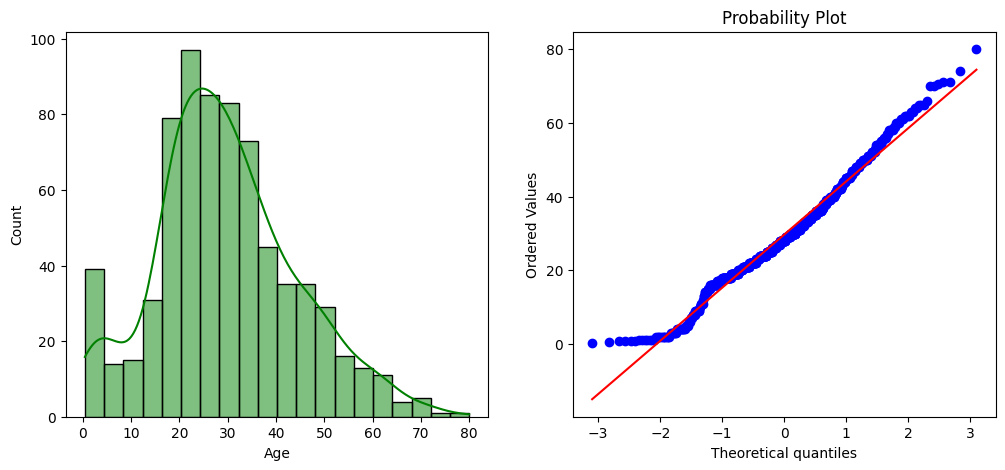

In [95]:
# dealing with null part. I will try to impute the null place with statistic approach for numeric dtypes. Here Age = int64, cabin = obj, embarked = obj
#lets analysis with statistic approach is best
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
fig, axis = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df_train_data2['Age'], bins =20, color='green', kde = True, ax=axis[0])
stats.probplot(df_train_data2['Age'].dropna(), plot = axis[1])

plt.show()
#since the histogram is not ND so lets see how imputing missing value with different statistic approach impact it

In [96]:
df_train_data2['Age'] = df_train_data2['Age'].fillna(df_train_data2['Age'].median())
df_train_data2['Age'].isnull().sum()

/tmp/ipykernel_30/2310651369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_data2['Age'] = df_train_data2['Age'].fillna(df_train_data2['Age'].median())


0

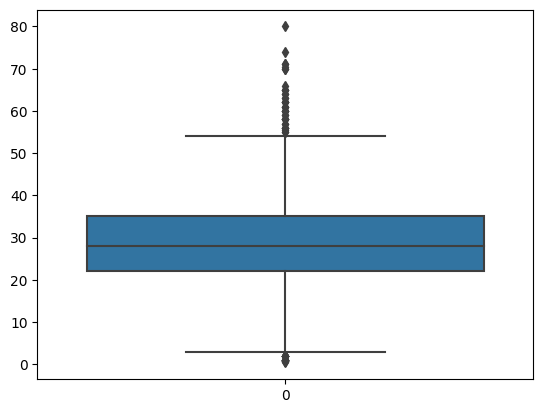

In [97]:
sns.boxplot(df_train_data2['Age'])
plt.show()

In [98]:
#removing outlier 
Q1 = df_train_data2['Age'].quantile(0.25)
Q3 = df_train_data2['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1

df_train_data_no_outliers = df_train_data2[(df_train_data2['Age'] >= lower_bound) & (df_train_data2['Age'] <= upper_bound)]

df_train_data_no_outliers.shape[0]

658

In [99]:
mean_age  =df_train_data_no_outliers['Age'].mean()
median_age  =df_train_data_no_outliers['Age'].median()
mode_age  =df_train_data_no_outliers['Age'].mode()

skewness = (3*(mean_age - median_age))/mode_age

mean_age, median_age, mode_age, skewness
#mean_age  =29.744, median_age = 28.0 , mode =24 skewness = 0, 0.218077 (without removing outlier)

(24.824468085106382,
 28.0,
 0    28.0
 Name: Age, dtype: float64,
 0   -0.340236
 Name: Age, dtype: float64)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


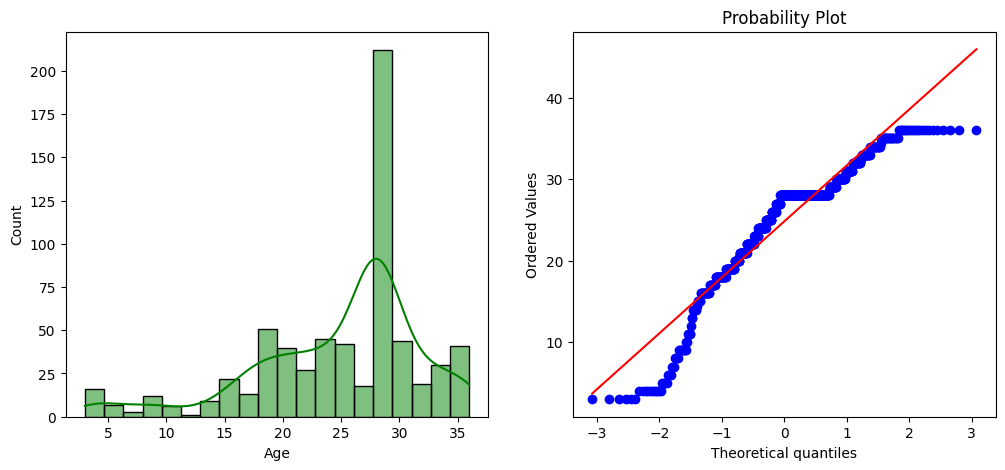

In [100]:
fig, axis = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df_train_data_no_outliers['Age'], bins =20, color='green', kde = True, ax=axis[0])
stats.probplot(df_train_data_no_outliers['Age'], plot = axis[1])

plt.show()

Here we can perform some feature engineering task for Age attribute

In [101]:
# since most of value of cabin is null so we will drop that colum as well
df_train_data3 = df_train_data_no_outliers.drop(columns=['Cabin'])
df_train_data3

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [102]:
df_train_data3['Embarked'].mode()[0]

'S'

In [103]:
df_train_data3['Embarked'] = df_train_data3['Embarked'].fillna(df_train_data3['Embarked'].mode()[0])
df_train_data3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [104]:
#It seems that ticket number has no impact on survival so remove it
df_train_data3 = df_train_data3.drop(columns='Ticket')
df_train_data3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [105]:
#now we will be dealing with  categorical value
df_train_data3['Sex'] = df_train_data3['Sex'].map({'male':0,'female':1})
df_train_data3['Embarked'] = df_train_data3['Embarked'].map({'S':1,'Q':2,'C':3})
df_train_data3.tail(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
880,1,2,1,25.0,0,1,26.0000,1
881,0,3,0,33.0,0,0,7.8958,1
882,0,3,1,22.0,0,0,10.5167,1
883,0,2,0,28.0,0,0,10.5000,1
884,0,3,0,25.0,0,0,7.0500,1
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,28.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,3
890,0,3,0,32.0,0,0,7.7500,2


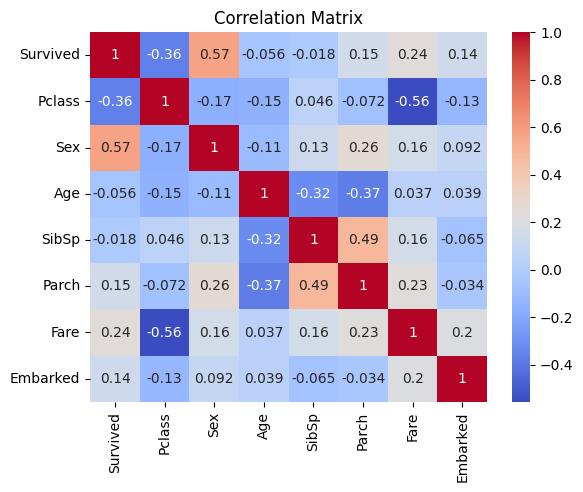

In [106]:
# let see the corelation among attributes
correlation = df_train_data3.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Here in corelation map we can observed that survival rate has positive correlation with sex, Parch, fare,Embarked attributes and -ve correlation with Pclass,Age,Sibsp attributes.
Among this we can see sex is highly related to survival rate, and Pclass is highy relates to survival chance(indicates Lower class has survived less)
So, with this analysis I will create surivival as dependent variable and Pclass and Sex as independent variable in new dataframe.

In [107]:
df_cleaned_train_data = df_train_data3.drop(columns=['Age','SibSp','Parch','Fare','Embarked'])
df_cleaned_train_data

,Survived,Pclass,Sex
0,0,3,0
2,1,3,1
3,1,1,1
4,0,3,0
5,0,3,0
...,...,...,...
886,0,2,0
887,1,1,1
888,0,3,1
889,1,1,0


# 4. Visulaization of cleaned dataset

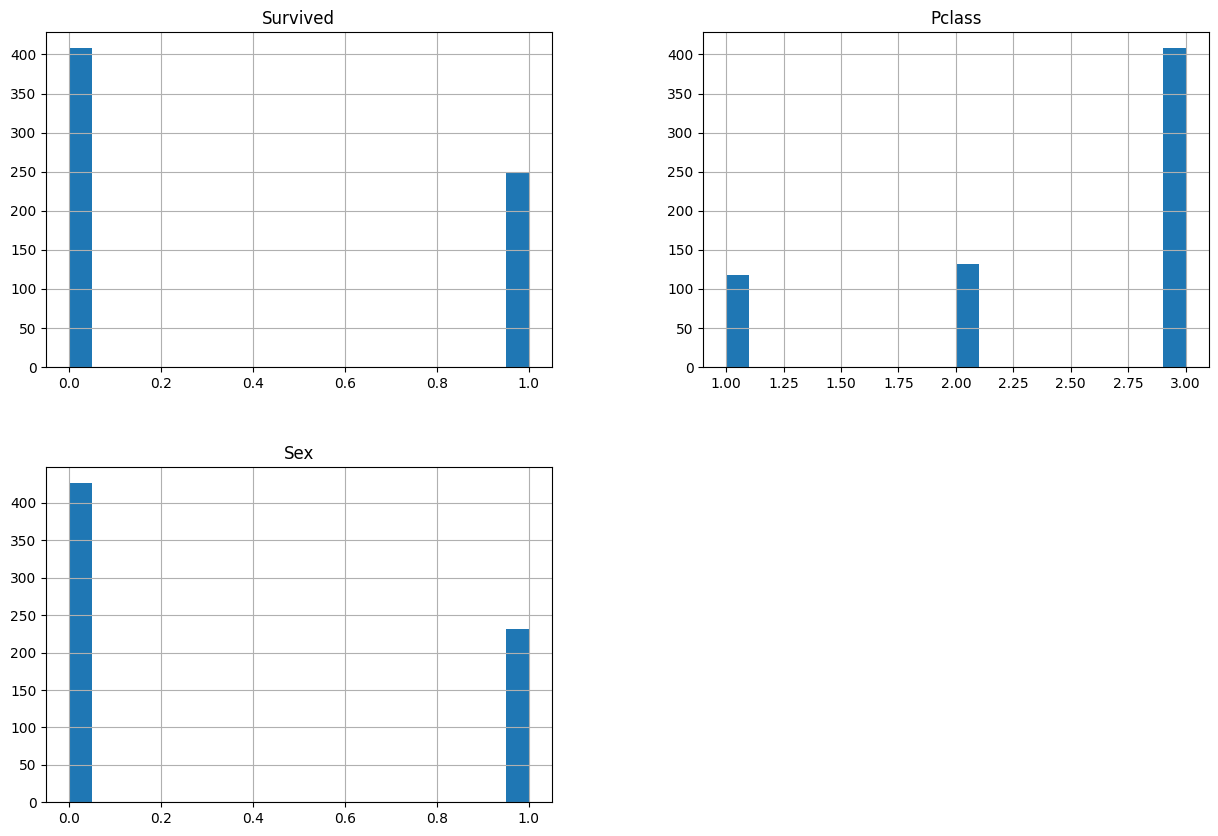

In [108]:
# lets plot the Data distribution 
df_cleaned_train_data.hist(bins = 20, figsize=(15,10))
plt.title("Numerical Columns Distribution")
plt.show()


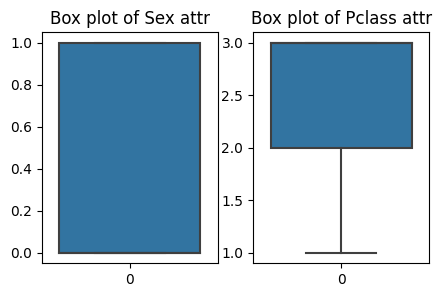

In [109]:
#detection of outliers and Q-Q plot
fig, axis = plt.subplots(1,2,figsize=(5,3))
sns.boxplot(df_cleaned_train_data['Sex'],ax=axis[0])
axis[0].set_title('Box plot of Sex attr')

sns.boxplot(df_cleaned_train_data['Pclass'],ax=axis[1])
axis[1].set_title('Box plot of Pclass attr')

plt.show()

In [110]:
#now lets look over test.csv
df_test_data.shape

(418, 11)

In [111]:
df_test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 7.Model Train


In [112]:
x = df_cleaned_train_data[['Pclass','Sex']]
y = df_cleaned_train_data['Survived']

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state= 100,shuffle=True,stratify=y)

In [114]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [115]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = model.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.803030303030303

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [117]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42, probability=True),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Loop through models and train them
results = {}
for name, model in models.items():
 
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
   
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:}")

Model: Random Forest
Accuracy: 0.803030303030303
Model: SVC
Accuracy: 0.803030303030303
Model: Logistic Regression
Accuracy: 0.803030303030303


# 8. Model Evaluation

In [118]:
df_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
df_test_data1 = df_test_data[['Pclass','Sex']]
df_test_data1['Sex'].mode()

0    male
Name: Sex, dtype: object

In [120]:
df_test_data1.isnull().sum()

Pclass    0
Sex       0
dtype: int64

In [121]:
df_test_data1['Sex'] = df_test_data1['Sex'].map({'male':0,'female':1})

/tmp/ipykernel_30/3916428690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_data1['Sex'] = df_test_data1['Sex'].map({'male':0,'female':1})


In [122]:
y_predict_test  = model.predict(df_test_data1)
y_predict_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
import numpy as np
df_result = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
result = np.array(df_result['Survived'])
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
accuracy_test = accuracy_score(result,y_predict_test)
accuracy_test

1.0